In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1= pd.read_excel('report-raw.xlsx',
                 skiprows=2,
                 header=0) 
df1.head()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Campaign name,Ad set name,Messaging outcome destination,Month,Unnamed: 5,Delivery status,Delivery level,Reach,Impressions,...,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
0,NaN,Video Ads Campain,All,All,All,NaN,archived,campaign,382304,894199,...,NaN,NaN,39547.14,NaN,NaN,NaN,8.105583,4879.0,2024-05-01,2025-04-30
1,NaN,NaN,C Paradise,All,All,NaN,archived,adset,382304,894199,...,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
2,NaN,new couple 30,All,All,All,NaN,archived,campaign,353382,735305,...,NaN,NaN,42467.72,NaN,NaN,NaN,7.488577,5671.0,2024-05-01,2025-04-30
3,NaN,NaN,new couple 30,All,All,NaN,archived,adset,353382,735305,...,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
4,NaN,Vide ads 27,All,All,All,NaN,archived,campaign,289340,603693,...,NaN,NaN,37313.39,NaN,NaN,NaN,8.060789,4629.0,2024-05-01,2025-04-30


### data cleaning 

In [6]:
df1['Campaign name'] = df1['Campaign name'].ffill()

In [8]:
df1 = df1[df1['Ad set name'].str.strip().str.lower() != 'all'].copy()

In [10]:
df1.head()

,Unnamed: 0,Campaign name,Ad set name,Messaging outcome destination,Month,Unnamed: 5,Delivery status,Delivery level,Reach,Impressions,...,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
1,NaN,Video Ads Campain,C Paradise,All,All,NaN,archived,adset,382304,894199,...,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
3,NaN,new couple 30,new couple 30,All,All,NaN,archived,adset,353382,735305,...,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
5,NaN,Vide ads 27,v ads 27,All,All,NaN,archived,adset,289340,603693,...,Messaging conversations started,4043.0,37313.39,9.229134,2024-09-27,Ongoing,8.060789,4629.0,2024-05-01,2025-04-30
7,NaN,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,All,All,NaN,archived,adset,228084,400074,...,Messaging conversations started,418.0,12344.19,29.531555,2025-02-05,Ongoing,10.134803,1218.0,2024-05-01,2025-04-30
9,NaN,5th Campaign,2Nd Bha,All,All,NaN,archived,adset,67838,194014,...,Link clicks,3659.0,2880.83,0.787327,2025-03-20,Ongoing,0.787327,3659.0,2024-05-01,2025-04-30


In [12]:
cols_to_drop=['Month', 'Messaging outcome destination','Unnamed: 0','Unnamed: 5' ]
df= df1.drop(cols_to_drop, axis=1)

In [14]:
df.head()

,Campaign name,Ad set name,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,Amount spent (INR),Cost per result,Starts,Ends,CPC (cost per link click),Link clicks,Reporting starts,Reporting ends
1,Video Ads Campain,C Paradise,archived,adset,382304,894199,2.338974,7-day click or 1-day view,Messaging conversations started,3071.0,39547.14,12.877610,2024-09-19,Ongoing,8.105583,4879.0,2024-05-01,2025-04-30
3,new couple 30,new couple 30,archived,adset,353382,735305,2.080765,7-day click or 1-day view,Messaging conversations started,5170.0,42467.72,8.214259,2024-09-30,Ongoing,7.488577,5671.0,2024-05-01,2025-04-30
5,Vide ads 27,v ads 27,archived,adset,289340,603693,2.086448,7-day click or 1-day view,Messaging conversations started,4043.0,37313.39,9.229134,2024-09-27,Ongoing,8.060789,4629.0,2024-05-01,2025-04-30
7,Valentines Day | Lead Form | Feb'25,Valentines Day | Whatsapp Lead | Feb'25,archived,adset,228084,400074,1.754064,7-day click or 1-day view,Messaging conversations started,418.0,12344.19,29.531555,2025-02-05,Ongoing,10.134803,1218.0,2024-05-01,2025-04-30
9,5th Campaign,2Nd Bha,archived,adset,67838,194014,2.859960,7-day click or 1-day view,Link clicks,3659.0,2880.83,0.787327,2025-03-20,Ongoing,0.787327,3659.0,2024-05-01,2025-04-30


In [16]:
df.reset_index(drop=True, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 1 to 768
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     0 non-null      float64
 1   Campaign name                  388 non-null    object 
 2   Ad set name                    388 non-null    object 
 3   Messaging outcome destination  388 non-null    object 
 4   Month                          388 non-null    object 
 5   Unnamed: 5                     0 non-null      float64
 6   Delivery status                388 non-null    object 
 7   Delivery level                 388 non-null    object 
 8   Reach                          388 non-null    int64  
 9   Impressions                    388 non-null    int64  
 10  Frequency                      388 non-null    float64
 11  Attribution setting            388 non-null    object 
 12  Result Type                    315 non-null    object 


### found date columns are in object datatype

In [21]:
df['Starts'] = pd.to_datetime(df['Starts'], format='%Y-%m-%d')
df['Reporting starts'] = pd.to_datetime(df['Reporting starts'], format='%Y-%m-%d')
df['Reporting ends'] = pd.to_datetime(df['Reporting ends'], format='%Y-%m-%d')

## finding here if 180 per conversion is an iodeal amount for us to make a profit
#### NOTE: MESSAGING CONVERSATION STARTED HAVE BEEN REGARDED AS "CONVERSIONS" IN THIS DATASET

In [26]:
conversions=  ['Messaging conversations started', 'Estimated call confirmation clicks']
df=df[df['Result Type'].isin(conversions)]

In [28]:
total_conv = df['Results'].sum()
total_spend = df['Amount spent (INR)'].sum()

In [40]:
df['Profit per conv'] = commision - df['Cost per result']

In [82]:
df['Cost per result'].mean()

21.2985776324424

In [42]:
commision=180
total_commision= total_conv * commision

In [44]:
cost_per_conversion = total_spend / total_conv
print(f"Cost per Conversion: {cost_per_conversion}")

Cost per Conversion: 11.374836539530746


In [46]:
print(f" Total Commission: ₹{total_commision:,.2f}")
print(f"Total Spend: ₹{total_spend:,.2f}")

 Total Commission: ₹3,237,480.00
Total Spend: ₹204,587.81


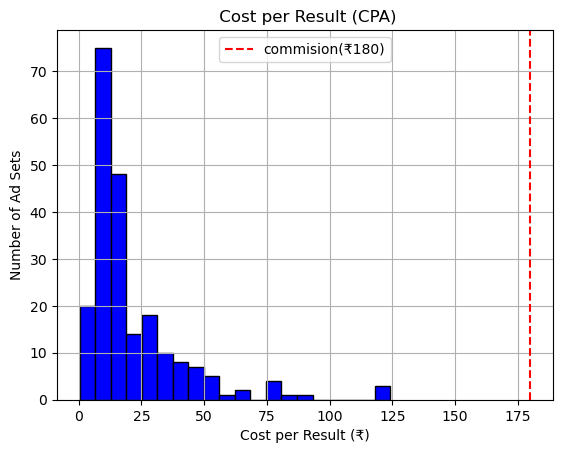

In [80]:
plt.hist(df['Cost per result'], bins=20, color='blue', edgecolor='black')
plt.axvline(x=180, color='red', linestyle='--', label='commision(₹180)')


plt.title(' Cost per Result (CPA)')
plt.xlabel('Cost per Result (₹)')
plt.ylabel('Number of Ad Sets')
plt.legend()

plt.grid(True)
plt.show()

In [68]:
avg_profit = df['Profit per conv'].mean()
print(f'Average profit:{avg_profit}')

Average profit:158.7014223675576


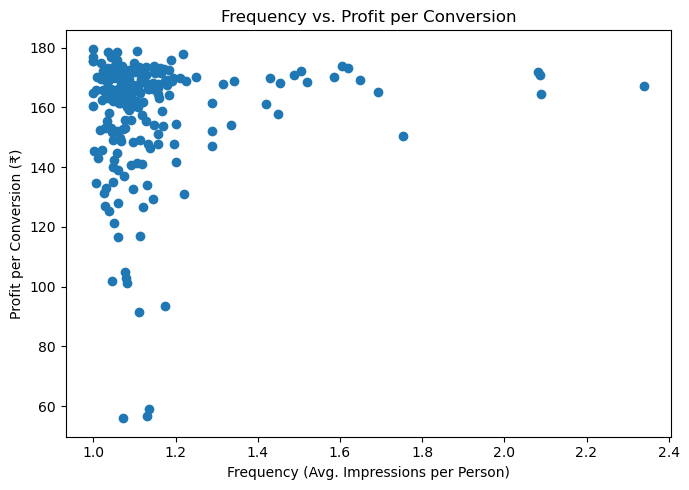

In [50]:
plt.figure(figsize=(7, 5))
plt.scatter(df['Frequency'], df['Profit per conv'])
plt.title('Frequency vs. Profit per Conversion')
plt.xlabel('Frequency (Avg. Impressions per Person)')
plt.ylabel('Profit per Conversion (₹)')
plt.tight_layout()
plt.show()

### ad‑sets that reach new users most days tend to yield the highest profit per conversion

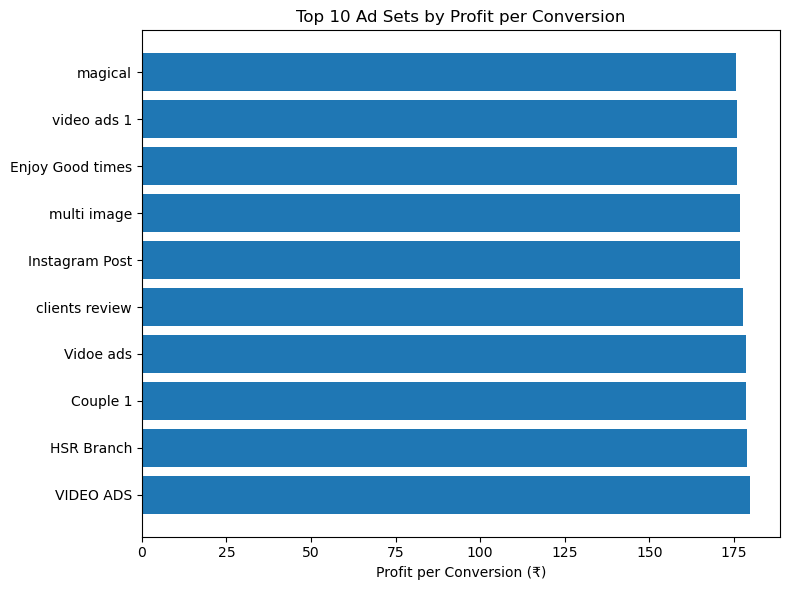

In [58]:
top10 = df.nlargest(10, 'Profit per conv').set_index('Ad set name')
plt.figure(figsize=(8, 6))
plt.barh(top10.index, top10['Profit per conv'])
plt.title('Top 10 Ad Sets by Profit per Conversion')
plt.xlabel('Profit per Conversion (₹)')
plt.tight_layout()
plt.show()

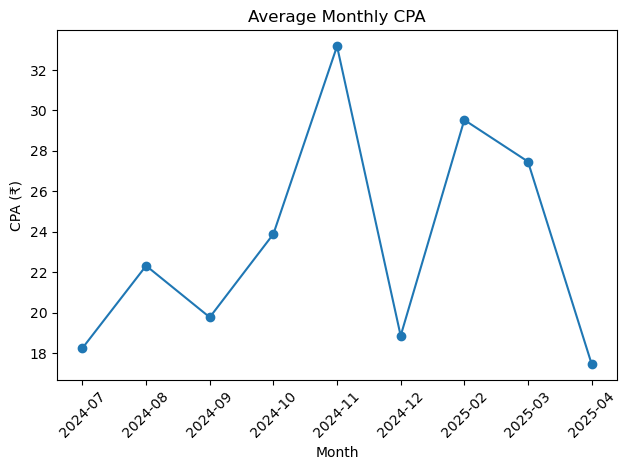

In [60]:
df['Month']  = df['Starts'].dt.to_period('M')

monthly = df.groupby('Month')['Cost per result'].mean()
plt.plot(monthly.index.astype(str), monthly.values, marker='o')
plt.title('Average Monthly CPA')
plt.xlabel('Month')
plt.ylabel('CPA (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Lowest CPA (~₹18) in April—possibly due to fresher audiences or lower competition.

#### A sharp spike (~₹33) in November, suggesting higher ad costs during peak shopping season driving CPA up.

#### Another bump (~₹30) in February, perhaps due to Valentine’s promotions.

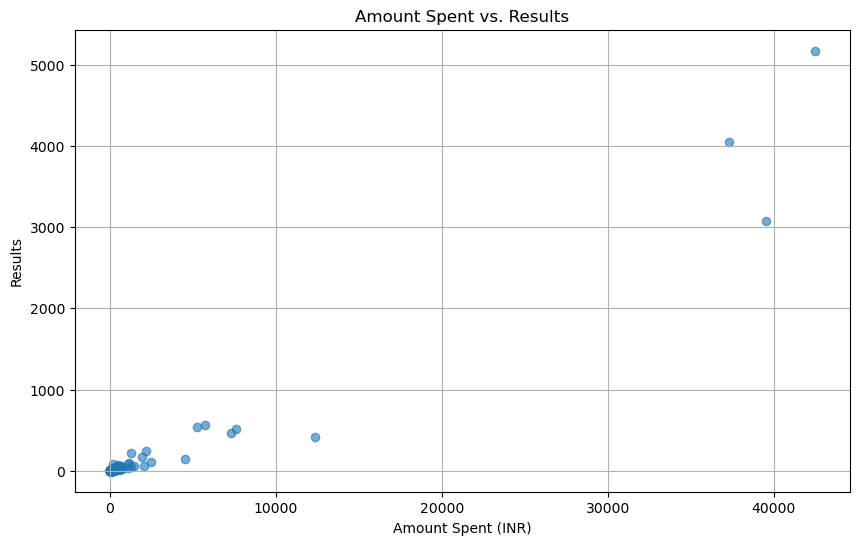

In [74]:
clean_df = df.dropna(subset=['Results', 'Amount spent (INR)'])

plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Amount spent (INR)'], clean_df['Results'], alpha=0.6)
plt.title('Amount Spent vs. Results')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Results')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128131 (\N{DANCER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


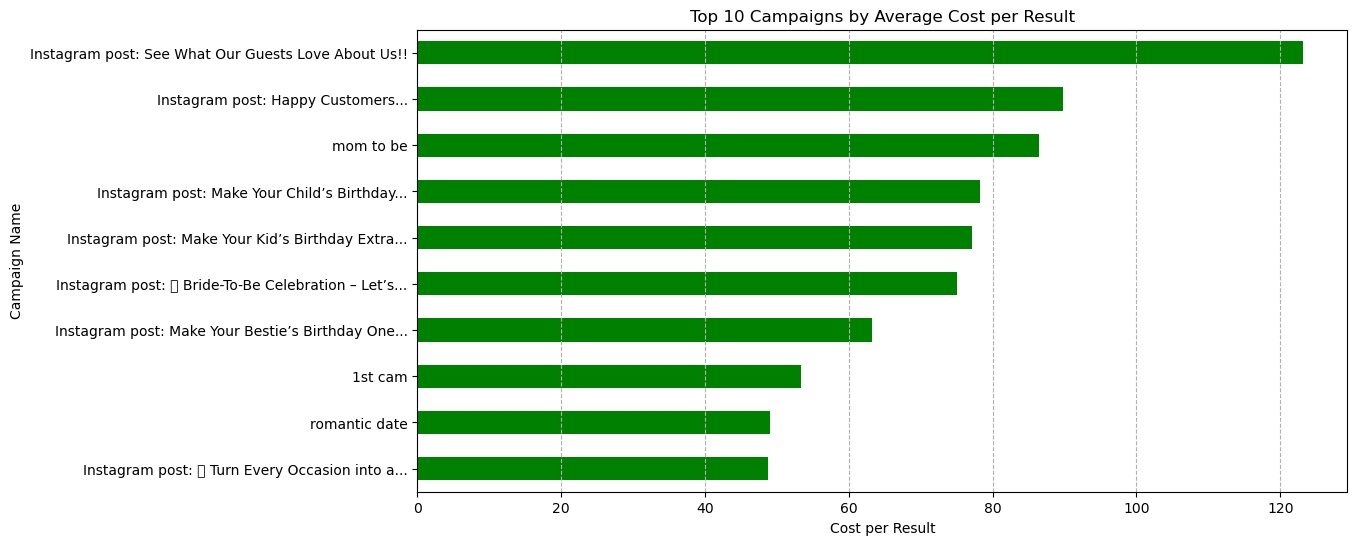

In [78]:
top_campaigns = df.groupby('Campaign name')['Cost per result'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_campaigns.plot(kind='barh', color='green')
plt.title('Top 10 Campaigns by Average Cost per Result')
plt.xlabel('Cost per Result')
plt.ylabel('Campaign Name')
plt.gca().invert_yaxis()  # Highest value at top
plt.grid(axis='x', linestyle='--')
plt.show()